In [1]:
from __future__ import print_function
from astropy.coordinates import SkyCoord
import astropy.units as units
from dustmaps.bayestar import BayestarQuery
import matplotlib.colors
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.mlab import griddata
import numpy as np
from scipy.stats import norm
import sfdmap

In [2]:
fullMag = [17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0]
fullPeriod = [0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0]
fullmeasuredPeriod = [0.0030891039459991962, 0.0059121389236552625, 0.0057950037424876841, 0.08889526351172887, 0.013264378174016218, 0.048329252075072202, 0.038517354431897334, 0.015947959865769683, 0.24816295515762818, 0.034483162881980452, 0.82254087343653881, 1.039913466537864, 0.50232696280175837, 3.7924860170946286, 1.8938121319433359, 11.287671447493086, 19.459999223142447, 33.565127558436501, 11.078262417992626, 28.797347077735484, 0.0030519447611982633, 0.0054555926322672095, 0.0042878595319683389, 0.016237768413312072, 0.02652538665353861, 0.050790799498232772, 0.015196278852509739, 0.14384506327178803, 0.24816353185216575, 0.42813637143465494, 0.73860834189050761, 1.2742067604728642, 2.1985480946357705, 3.7931595611830602, 6.5428288511850159, 11.285186353716234, 19.468868627730064, 33.574801069073779, 58.046312829361462, 100.02324240659526, 0.0031622773427802029, 0.0054555949084115736, 0.0094120525375699718, 0.016237767178805002, 0.028013624933374105, 0.048329308578140009, 0.083377660546322299, 0.14384532161696853, 0.24816184983392289, 0.42812850444397771, 0.73864325210149784, 1.274309394054951, 2.1984764306326929, 3.7921268913777064, 6.5444327186694444, 11.283795179104782, 19.446415154056577, 33.61972393401377, 58.033169342062237, 99.984221973728864, 0.0031622776627238517, 0.0054555956748687769, 0.0094120507402242239, 0.016237757097004282, 0.028013574105072065, 0.048329354145226419, 0.083378425459575523, 0.14384566069642626, 0.24816329156244935, 0.42812807534371028, 0.73861217333781415, 1.274294188036563, 2.1982916344994869, 3.7923850061118034, 6.5421274063354433, 11.288665791484513, 19.478930398425813, 33.623252380482697, 57.95705433890793, 100.20312938543674, 0.0031622775690818019, 0.0054555945367960384, 0.0094120521919265048, 0.016237767590307338, 0.028013568593580514, 0.048329297642052065, 0.083378398334752052, 0.14384524088399994, 0.24816324350456193, 0.4281368005515524, 0.73861089618429532, 1.2742422368784185, 2.1983293454729051, 3.7922615555508656, 6.5444995635457879, 11.290853965039259, 19.482780295061108, 33.611787636473885, 57.844560958526742, 100.10137471376831, 0.0031622774130117305, 0.0054555951406713103, 0.0094120490811364487, 0.01623776265228068, 0.028013573492684005, 0.048329315868868065, 0.083378186761734696, 0.14384420751000562, 0.24816415660760616, 0.42813007781898416, 0.73861387621604324, 1.2742802495051677, 2.198351972678005, 3.7922952230885842, 6.5439314256186574, 11.294535988795543, 19.477154036183713, 33.600330708220127, 57.878524503267293, 100.117015825265, 0.0031622775456712896, 0.0054555947690557421, 0.0094120479059496293, 0.016237762240778594, 0.028013574105072065, 0.048329224734925534, 0.083378360360028853, 0.14384486951351161, 0.24816170566199158, 0.42813494105120919, 0.7386245193828741, 1.2742561745782306, 2.1983632864552307, 3.792822759236206, 6.5431629254124459, 11.293839205529498, 19.476561987431335, 33.585360350985859, 58.059462271544568, 99.828444216001117, 0.0031622774988502677, 0.0054555954890609494, 0.0094120472837920226, 0.016237766150049255, 0.028013553283893149, 0.048329295819371218, 0.083378089113011922, 0.14384470804868002, 0.24816180177659383, 0.42813508408912365, 0.7386245193828741, 1.2742498392223367, 2.1982463830391881, 3.7926992801744133, 6.5421942041268917, 11.28459009402358, 19.475082023008291, 33.614432652632551, 57.96491904452121, 99.898484095249088, 0.0031622775222607787, 0.0054555951871232584, 0.009412048113335519, 0.016237764504040325, 0.028013585740450226, 0.048329321336915546, 0.083378078263167954, 0.14384540235002777, 0.24816463719085466, 0.42813193727708304, 0.73862792526104148, 1.2742764481404354, 2.1984613440694609, 3.7927329554848161, 6.5422276035341431, 11.286080861409864, 19.459703715497724, 33.621488064673997, 58.125298947521998, 100.05448068855314, 0.00316227799047107, 0.0054555937703391543, 0.0094120513623822902, 0.016237772116834411, 0.028013585740450226, 0.048329368726712216, 0.08337827356079143, 0.14384475648809145, 0.24816170566199158, 0.42812793231047891, 0.73861472765810221, 1.2742384357404768, 2.1982991765906652, 3.7926543806907529, 6.5426952310456707, 11.28568328492883, 19.478930398425813, 33.609143036538818, 58.014778456348793, 99.968622323798385, 0.0031622772803521822, 0.0054555946529258872, 0.0094120500489375796, 0.016237771499580569, 0.028013596763448986, 0.050790785406717491, 0.083378235586181876, 0.14384527317717652, 0.24816228235072188, 0.42813622839588023, 0.73861089618429532, 1.2742650441823171, 2.1983821430093915, 3.7929574728374225, 6.5444995635457879, 11.286876098413735, 19.468572850655296, 33.5985687970702, 57.967541087405529, 100.08573848867685, 0.0031622776939378692, 0.005455594931637546, 0.0094120523301838895, 0.016237768413312072, 0.028013561857316013, 0.048329284883289039, 0.083378316960387555, 0.1438448372205163, 0.24816348379418524, 0.42813823094742331, 0.73858918525021222, 1.274257441656969, 2.1984387146128399, 3.7926543806907529, 6.5427954456385136, 11.290257106308662, 19.473602283484109, 33.623252380482697, 58.088412025491955, 99.789575592473483, 0.0031622775612782975, 0.0054555952568011842, 0.0094120483898500491, 0.016237766973053843, 0.028013588190004757, 0.048329308578140009, 0.083378083688089591, 0.14384522473741709, 0.24816314738884288, 0.42813279549396105, 0.73860451048295106, 1.2742967223477597, 2.1983632864552307, 3.7926431559859433, 6.5428956633013815, 11.285086972725079, 19.480707084714293, 33.569523917615591, 57.938711656080166, 99.805119409240007, 0.0031622772725486792, 0.0054555957909986743, 0.0094120479750782575, 0.016237774585850243, 0.028013574717460143, 0.048329345031802258, 0.083378224736299786, 0.14384545078990679, 0.24816257069609213, 0.42813150816993434, 0.73861685627183793, 1.2742511062884756, 1.8252152920412112, 3.7925982578311075, 6.5440316780850019, 11.28876523551896, 19.466502662743228, 33.617078085113079, 58.051571891422036, 99.758502479338262, 0.0031622777407588972, 0.0054555947922817136, 0.009412051224124935, 0.016237771705331847, 0.028013562469703563, 0.048329343209117845, 0.083378067413326817, 0.14384532161696853, 0.24816213817828803, 0.42813393978848385, 0.73860365906444769, 1.2742219644047834, 2.1982690085364616, 3.7931146508008244, 6.5431963347115438, 11.291450886878994, 19.460885799928668, 33.61090605691998, 57.980654860875127, 99.789575592473483, 0.0031622774832432607, 0.0054555944206661931, 0.0094120486663645964, 0.016237774585850243, 0.028013579004177482, 0.048329228380276631, 0.083378208461481945, 0.14384465960930123, 0.2481619459486368, 0.42813050692326565, 0.73858067150681994, 1.2742688454790103, 2.1982011334418381, 3.7933279845884456, 6.5440985147690922, 11.288069164068471, 19.475377997899351, 33.591522999880823, 57.83933933535824, 99.992023624527491, 0.0031622775144572748, 0.0054555955122869279, 0.0094120499798089202, 0.016237761417774485, 0.028013562469703556, 0.048329246607040389, 0.083378474284302229, 0.14384475648809145, 0.2481643488406822, 0.42813494105120919, 0.73860749046317098, 1.2742827837609227, 2.1983557439241412, 3.7924860170946286, 6.5430626995621557, 11.289163029177802, 19.480707084714293, 33.602092804169217, 58.012152138449018, 100.10137471376831, 0.0031622775222607787, 0.0054555948387336574, 0.0094120515697683309, 0.016237762858031732, 0.028013529400814273, 0.048329290351329511, 0.083378154212135028, 0.14384425594907993, 0.24816242652332324, 0.42813079299326462, 0.7386402718327042, 1.2742802495051677, 2.1984802023058538, 3.7925758091523223, 6.5444661409369287, 11.285583895185248, 19.483965184824605, 33.616196228022183, 57.980654860875127, 100.29724056003305, 0.003162277420815234, 0.0054555954890609494, 0.0094120526758273669, 0.016237761006272462, 0.028013560632540999, 0.048329323159598314, 0.083378452584416632, 0.14384609665807796, 0.24816103286186045, 0.42813279549396105, 0.7386223907249696, 1.274254907502012, 2.1982765504723862, 3.7926543806907529, 6.5431629254124459, 11.287870302277494, 19.469460208842047, 33.599449729547082, 57.98327832760409, 100.20312938543674, 0.0031622776939378692, 0.0054555952335752092, 0.009412050118066239, 0.016237773351342234, 0.028013585128061663, 0.048329312223503763, 0.083378354935071217, 0.14384490180652143, 0.24816103286186045, 0.42813594231861762, 0.73861813344596849, 1.2742206973965988, 2.1983482014448077, 3.7928452108385442, 6.5420940079512357, 11.285385120949769, 19.492559947706269, 33.630311495785307, 57.818462266390355, 100.03105014825654]
fullSigLevel = [0.30600000000000005, 0.9319999999999999, 0.256, 0.72, 0.33799999999999997, 0.904, 0.06399999999999995, 0.94, 0.8180000000000001, 0.49, 0.10799999999999998, 0.804, 0.19999999999999996, 0.726, 0.97, 0.482, 0.876, 0.0, 0.944, 0.908, 0.11109999999999998, 0.7336, 0.36560000000000004, 0.7886, 0.8497, 0.5952, 0.09950000000000003, 0.8247, 0.9805, 0.9995, 0.9984, 0.999, 0.9661, 0.9516, 0.956, 0.9992, 0.993, 0.9939, 1.0, 1.0, 0.09419999999999995, 1.0, 0.996, 0.9995, 1.0, 0.23319999999999996, 0.07269999999999999, 1.0, 0.9981, 1.0, 0.9994, 0.9073, 0.9335, 1.0, 0.9995, 0.9897, 0.9992, 1.0, 1.0, 1.0, 0.9003, 1.0, 1.0, 1.0, 1.0, 0.9994, 0.888, 1.0, 0.9658, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.47030000000000005, 1.0, 0.9989, 0.9997, 1.0, 0.9444, 0.991, 0.9988, 0.9462, 0.9997, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 1.0, 1.0, 1.0, 1.0, 0.18300000000000005, 1.0, 1.0, 0.952, 1.0, 1.0, 0.9999, 1.0, 0.9993, 0.9999, 1.0, 1.0, 1.0, 0.9993, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8835, 1.0, 1.0, 1.0, 1.0, 0.8394, 0.5445, 1.0, 0.8407, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999, 1.0, 1.0, 1.0, 0.45430000000000004, 1.0, 1.0, 1.0, 1.0, 0.9984, 0.9976, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.4668, 1.0, 1.0, 0.9984, 1.0, 0.9991, 0.9399, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9998, 1.0, 1.0, 1.0, 1.0, 0.6505000000000001, 1.0, 1.0, 0.9979, 1.0, 0.9998, 1.0, 1.0, 1.0, 0.9999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9705, 1.0, 1.0, 1.0, 1.0, 0.9999, 0.9782, 1.0, 0.9395, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9991, 1.0, 1.0, 1.0, 1.0, 0.7223999999999999, 1.0, 1.0, 1.0, 1.0, 0.9996, 0.7186, 1.0, 0.9998, 0.9997, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.010399999999999965, 1.0, 0.9997, 1.0, 1.0, 1.0, 0.9873, 1.0, 0.9776, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999, 0.9997, 1.0, 1.0, 1.0, 1.0, 0.059599999999999986, 1.0, 1.0, 0.9929, 1.0, 1.0, 0.9661, 1.0, 0.9999, 0.9996, 1.0, 1.0, 0.9999, 1.0, 1.0, 0.9223, 1.0, 1.0, 1.0, 1.0, 0.9238, 1.0, 1.0, 0.9614, 1.0, 0.9991, 0.987, 1.0, 0.6728000000000001, 1.0, 1.0, 1.0, 0.9982, 1.0, 1.0, 0.9999, 0.9996, 1.0, 1.0, 1.0, 0.8402000000000001, 1.0, 1.0, 1.0, 1.0, 0.9778, 0.28, 1.0, 0.9986, 0.9999, 1.0, 1.0, 1.0, 0.9996, 1.0, 0.9983, 1.0, 1.0, 1.0, 1.0, 0.5533, 1.0, 1.0, 0.9998, 1.0, 0.9859, 0.9489, 1.0, 0.5119, 0.9162, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9939, 0.9984, 1.0, 1.0, 1.0, 0.39349999999999996, 1.0, 1.0, 0.9998, 1.0, 0.9995, 0.8902, 1.0, 0.4334, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9702, 1.0, 1.0, 1.0, 1.0, 0.9996, 0.8898, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.272, 1.0, 1.0, 1.0, 1.0, 0.953, 0.992, 1.0, 0.9988, 0.9999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [3]:
#fullMag = [17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0]

In [4]:
#fullPeriod = [0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0]

In [5]:
#fullmeasuredPeriod = [0.010501209016139872, 0.0054259112052038334, 0.0052090839562447082, 0.014581861674730799, 0.01134247263632321, 0.023149624851904978, 0.02035514151287985, 0.021056334057780752, 0.084153500651593036, 0.32262662319692653, 0.73864154908781376, 0.9570181165759275, 2.1984915174029842, 3.7924523461691479, 6.5463717746382324, 11.286577871404711, 19.47271454769972, 33.537018104826821, 11.701821222039452, 100.18746135772307, 0.0031622775768853058, 0.005455593793565118, 0.0094120472837920226, 0.016237756685502477, 0.028013572267907974, 0.04832927576989101, 0.076944678856943949, 0.014928686886319644, 0.24816607895176845, 0.42812221105959303, 0.73863814308400433, 6.6491213371017723, 2.1985179197492428, 3.792441122660184, 6.5464721018909655, 11.283000376169712, 19.471826892849403, 33.522104098762064, 57.98327832760409, 99.859560922579647, 0.0031622776939378692, 0.0054555943045363538, 0.009412048113335519, 0.016237757302755191, 0.028013594313892953, 0.048329290351329511, 0.083378089113011922, 0.18561943164, 0.24816569448055345, 0.42812449954159798, 0.73862835099802082, 1.274247305097618, 1.8249189780106652, 3.7924972408693205, 6.5452349473192166, 11.285484507192244, 19.480114819940837, 33.565127558436501, 57.933473021898493, 100.09355599056505, 0.0031622776939378692, 0.0054555946064739468, 0.0094120483207214157, 0.016237759977517495, 0.028013579004177482, 0.048329310400821814, 0.083378192186670461, 0.16809122180972624, 0.24816444495733189, 0.42813136513440925, 0.73862068780748003, 1.2742282994835019, 2.1985254633932216, 3.7923064457340017, 6.5443658751585811, 11.285285736457784, 19.473898213399497, 33.568644553648589, 57.928235334952475, 99.960824324096862, 0.0031622777095448784, 0.0054555945832479771, 0.0094120482515927823, 0.016237759566015544, 0.028013579004177482, 0.048329315868868065, 0.083378186761734696, 0.16809126590680862, 0.24816444495733189, 0.42813122209897969, 0.73862026207933451, 1.2742270324627187, 2.1985254633932216, 3.7923176684458419, 6.5443324539151915, 11.285186353716234, 19.473306362562624, 33.566885963918601, 57.925616846612563, 99.960824324096862, 0.0031622777095448784, 0.0054555945600220073, 0.0094120483898500491, 0.016237759566015544, 0.028013580228954102, 0.048329319514232916, 0.083378197611606905, 0.16809131000391411, 0.2481643488406822, 0.42813150816993434, 0.73861983635167983, 1.2742295665068046, 2.1985292352346244, 3.7922952230885842, 6.5443658751585811, 11.285285736457784, 19.473010450634632, 33.562490295614779, 57.933473021898493, 99.953027540858159, 0.003162277701741374, 0.0054555945135700678, 0.0094120483207214157, 0.016237759771766516, 0.028013579616565774, 0.048329315868868065, 0.083378197611606905, 0.16809113361563094, 0.24816425272410694, 0.42813165120555502, 0.73862068780748003, 1.2742295665068046, 2.198521691564761, 3.7922840005095897, 6.5444327186694444, 11.285186353716234, 19.474786057113189, 33.566885963918601, 57.930854060037085, 99.960824324096862, 0.0031622778422044622, 0.0054555946296999166, 0.0094120488046218771, 0.016237760800521459, 0.028013578391789209, 0.048329252075072202, 0.083378170486931691, 0.1438448372205163, 0.24816415660760616, 0.4281340828257294, 0.7386219649948611, 1.2742561745782306, 2.1984990608657782, 3.7925870334584952, 6.54399826025492, 11.287373178452981, 19.474786057113189, 33.575680755626657, 57.922998594985231, 99.92964448707319, 0.003162277834400957, 0.0054555946296999166, 0.0094120489428791611, 0.016237761212023472, 0.028013579616565774, 0.048329252075072202, 0.083378137937344721, 0.14384491795303178, 0.24816415660760616, 0.4281340828257294, 0.7386219649948611, 1.2742612429083036, 2.1985028326165876, 3.7925870334584952, 6.5440316780850019, 11.287770874009492, 19.474786057113189, 33.580959843132611, 57.91252795495997, 99.92964448707319, 0.0031622778422044622, 0.0054555945832479771, 0.0094120490120078049, 0.016237760800521459, 0.028013580228954102, 0.048329255720427435, 0.083378170486931691, 0.1438447887810505, 0.24816425272410694, 0.4281332246036903, 0.73861983635167983, 1.2742625099971214, 2.1985028326165876, 3.7925982578311075, 6.5440985147690922, 11.287273758942495, 19.473306362562624, 33.574801069073779, 57.930854060037085, 99.937437622630824, 0.0031622778265974522, 0.0054555946761518587, 0.0094120490811364487, 0.016237759771766516, 0.028013580228954102, 0.048329253897749745, 0.083378165061998757, 0.14384490180652143, 0.24816420466584724, 0.42813465497566694, 0.73861855917166019, 1.274254907502012, 2.1984613440694609, 3.7925758091523223, 6.5440316780850019, 11.287870302277494, 19.473306362562624, 33.588881587731905, 57.922998594985231, 99.937437622630824, 0.0031622778265974522, 0.0054555945600220073, 0.0094120485972359596, 0.01623775936026458, 0.028013580228954102, 0.048329263011139538, 0.083378165061998757, 0.14384474034161734, 0.24816458913244607, 0.42813465497566694, 0.73862153926524332, 1.2742612429083036, 2.198521691564761, 3.7925309125919959, 6.5438980088124659, 11.287572022728231, 19.472714547699724, 33.566006738148374, 57.93609222056881, 99.92964448707319, 0.0031622778187939469, 0.0054555946993778293, 0.0094120485972359596, 0.016237759977517495, 0.02801358145373083, 0.048329257543105249, 0.083378116237634206, 0.14384490180652143, 0.24816333962035539, 0.42813222334899342, 0.73862281645556915, 1.2742637770884593, 2.1984877456909993, 3.7925758091523223, 6.5438980088124659, 11.286876098413735, 19.474490100213625, 33.587120877068237, 57.93609222056881, 99.921852566840428, 0.0031622778812219897, 0.005455594374214257, 0.0094120484589786859, 0.016237761417774485, 0.02801358145373083, 0.048329261188461307, 0.083378181336799667, 0.14384506327178803, 0.24816415660760616, 0.42813494105120919, 0.73862153926524332, 1.2742612429083036, 2.1984462577132842, 3.7925645849125864, 6.5439648427661394, 11.286577871404711, 19.478042176804507, 33.577440267030575, 57.91252795495997, 99.921852566840428, 0.0031622777953834317, 0.0054555947690557421, 0.009412049150265096, 0.016237761006272462, 0.028013575942236388, 0.048329248429717524, 0.083378246436066783, 0.14384503097870571, 0.24816338767828006, 0.42813365371427969, 0.73861983635167983, 1.2742536404283133, 2.1984839739919559, 3.792508464710445, 6.5437977604415893, 11.288566349202078, 19.477154036183713, 33.586240590956201, 57.904677458851026, 99.937437622630824, 0.0031622778031869369, 0.0054555947458297706, 0.0094120489428791611, 0.016237761829276529, 0.028013582066119237, 0.048329259365783209, 0.083378186761734696, 0.14384490180652143, 0.19871516271292183, 0.42813622839588023, 0.73861855917166019, 1.2742637770884593, 2.1984387146128399, 3.7925421366324237, 6.54399826025492, 11.289262481973006, 19.477450074057938, 33.594164827500961, 57.891598027361752, 99.953027540858159, 0.0031622777953834317, 0.0054555949780894933, 0.0094120492885223887, 0.016237761829276529, 0.028013586352838817, 0.048329259365783209, 0.083378230161240477, 0.14384503097870571, 0.24816415660760616, 0.42813594231861762, 0.73861813344596849, 1.274257441656969, 2.1984387146128399, 3.7924635697445432, 6.5437977604415893, 11.288665791484513, 19.482187904220762, 33.597687910785837, 57.88898285007938, 99.92964448707319, 0.0031622778578114727, 0.0054555947458297706, 0.0094120493576510377, 0.016237761006272462, 0.028013579616565774, 0.048329242961686544, 0.083378203036544071, 0.14384506327178803, 0.24816396437482793, 0.42813794486748452, 0.73861770772076762, 1.2742739139098802, 2.1984802023058538, 3.7925533607392863, 6.5436306866488048, 11.29015763598847, 19.478338241677669, 33.591522999880823, 57.899444977111713, 99.937437622630824, 0.0031622778422044622, 0.0054555951871232584, 0.0094120488737505191, 0.016237761006272462, 0.028013587577616083, 0.048329246607040389, 0.083378186761734696, 0.14384493409954577, 0.24816415660760616, 0.42813508408912365, 0.73861855917166019, 1.274289119444411, 2.1984651156908575, 3.7925758091523223, 6.5434636213871338, 11.288864681305467, 19.483668948872356, 33.604736294654884, 57.909910886414245, 99.960824324096862, 0.0031622779046325059, 0.0054555947458297706, 0.0094120483207214157, 0.016237766150049255, 0.028013589414782183, 0.048329304932776818, 0.083378257285954521, 0.14384507941833463, 0.24816261875371898, 0.42813808790740615, 0.73862153926524332, 1.2742764481404354, 2.1983632864552307, 3.7925309125919959, 6.5430961078377559, 11.287770874009492, 19.482187904220762, 33.600330708220127, 57.870683222695448, 99.859560922579647]

In [6]:
#fullSigLevel = [0.5, 0.41800000000000004, 0.21799999999999997, 0.236, 0.62, 0.806, 0.02400000000000002, 0.8200000000000001, 0.482, 0.15000000000000002, 0.632, 0.062000000000000055, 0.796, 0.244, 1.0, 0.772, 0.98, 0.18799999999999994, 0.5640000000000001, 0.6579999999999999, 0.5900000000000001, 0.996, 0.846, 0.47, 0.974, 0.922, 0.748, 0.872, 0.40800000000000003, 0.62, 0.996, 0.986, 1.0, 0.906, 1.0, 1.0, 1.0, 0.984, 0.994, 1.0, 0.69, 1.0, 0.994, 0.998, 1.0, 1.0, 0.868, 0.6819999999999999, 0.986, 0.988, 1.0, 1.0, 1.0, 0.968, 1.0, 0.996, 1.0, 0.998, 1.0, 1.0, 0.508, 1.0, 1.0, 1.0, 1.0, 1.0, 0.978, 1.0, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.46199999999999997, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 1.0, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.398, 1.0, 1.0, 1.0, 1.0, 1.0, 0.996, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 1.0, 1.0, 0.406, 1.0, 1.0, 1.0, 1.0, 1.0, 0.988, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.608, 1.0, 1.0, 1.0, 1.0, 1.0, 0.982, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.35, 1.0, 1.0, 1.0, 1.0, 1.0, 0.974, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.29400000000000004, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 0.988, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.502, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.16200000000000003, 1.0, 1.0, 1.0, 1.0, 1.0, 0.968, 1.0, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.05400000000000005, 1.0, 1.0, 1.0, 1.0, 1.0, 0.938, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.78, 1.0, 1.0, 0.85, 1.0, 0.28200000000000003, 0.894, 0.998, 0.9359999999999999, 1.0, 1.0, 1.0, 0.996, 0.998, 1.0, 0.992, 1.0, 0.998, 1.0, 1.0, 0.08399999999999996, 1.0, 1.0, 1.0, 1.0, 1.0, 0.97, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.23199999999999998, 1.0, 1.0, 1.0, 1.0, 1.0, 0.992, 1.0, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.23199999999999998, 1.0, 1.0, 1.0, 1.0, 0.996, 0.958, 1.0, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.040000000000000036, 1.0, 1.0, 1.0, 1.0, 0.996, 0.968, 1.0, 0.98, 1.0, 1.0, 1.0, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.516, 1.0, 1.0, 1.0, 1.0, 1.0, 0.986, 1.0, 0.96, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 0.998, 1.0, 1.0, 1.0]

In [7]:
fullPeriod = [x*2 for x in fullPeriod]
fullmeasuredPeriod = [x*2 for x in fullmeasuredPeriod]

In [8]:
reshapelen = (len(fullMag))**0.5
reshapelen = int(reshapelen)
fullMagArray = np.asarray(fullMag)
fullMag = fullMagArray.reshape(-1,reshapelen)
fullMag = fullMag.tolist()
fullPeriodArray = np.asarray(fullPeriod)
fullPeriod = fullPeriodArray.reshape(-1,reshapelen)
fullPeriod = fullPeriod.tolist()
fullmeasuredPeriodArray = np.asarray(fullmeasuredPeriod)
fullmeasuredPeriod = fullmeasuredPeriodArray.reshape(-1,reshapelen)
fullmeasuredPeriod = fullmeasuredPeriod.tolist()
fullSigLevelArray = np.asarray(fullSigLevel)
fullSigLevel = fullSigLevelArray.reshape(-1,reshapelen)
fullSigLevel = fullSigLevel.tolist()

In [9]:
for x in range(len(fullPeriod)):
    fullPeriod[x], fullSigLevel[x], fullmeasuredPeriod[x] = (list(t) for t in zip(*sorted(zip(fullPeriod[x],fullSigLevel[x],fullmeasuredPeriod[x]))))

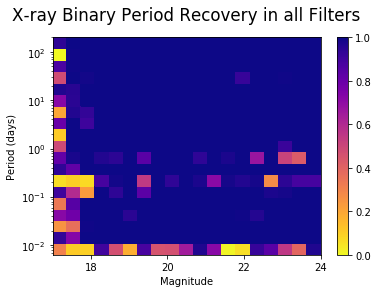

In [10]:
FilterLabel = ['u','g','r','i','z','y']


im = plt.pcolor(fullMag,fullPeriod,fullSigLevel,cmap='plasma_r',vmin=0,vmax=1)
plt.yscale('log')
plt.colorbar(im)
font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}
plt.rc('font', **font)
plt.rc('axes',linewidth=2)
plt.xlabel('Magnitude')#,fontweight='semibold')
plt.ylabel('Period (days)')#,fontweight='semibold')
plt.title('X-ray Binary Period Recovery in all Filters',y=1.05)#,fontweight='semibold')
plt.show()

In [11]:
count = 0
othercount = 0
seventeenth = 0
twentyfour = 0
lowPeriod = 0
highPeriod = 0
bigSig = 0
for y in range(0,len(fullPeriod)):
    for z in range(0, len(fullPeriod[0])):
        if fullmeasuredPeriod[y][z] < (fullPeriod[y][z]+(fullPeriod[y][z]*0.05)) and fullmeasuredPeriod[y][z] > (fullPeriod[y][z]-(fullPeriod[y][z]*0.05)):
            donothing = 0
            othercount += 1
            if y == 0:
                seventeenth += 1
            if y == (len(fullPeriod)-1):
                twentyfour += 1
            if z == 0:
                lowPeriod += 1
            if z == len(fullPeriod[0]) - 1:
                highPeriod += 1
            if fullSigLevel[y][z] == 1.0:
                bigSig += 1
        else: 
            fullSigLevel[y][z] = 0
            count += 1

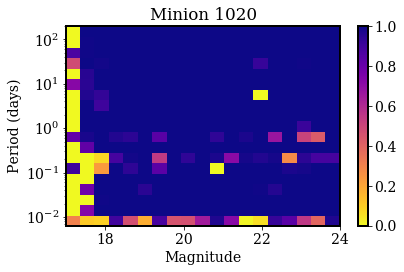

In [12]:
FilterLabel = ['u','g','r','i','z','y']


im = plt.pcolor(fullMag,fullPeriod,fullSigLevel,cmap='plasma_r',vmin=0,vmax=1)
plt.yscale('log')
plt.colorbar(im)
font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}
plt.rc('font', **font)
plt.rc('axes',linewidth=2)
plt.title('Minion 1020')
plt.xlabel('Magnitude')#,fontweight='semibold')
plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery using the Minion_1020 Observing Strategy',y=1.05)#,fontweight='semibold')
plt.tight_layout()
plt.savefig('panstars500sig.png',dpi = 500,bbox_inches='tight')
#plt.tight_layout()
plt.show()

In [13]:
print('lowPeriod',lowPeriod/20.)
print('highPeriod',highPeriod/20.)
print('seventeenth',seventeenth/20.)
print('twentyfour',twentyfour/20.)
print('bigSig',bigSig/400.)
print('tot',othercount/400.)

lowPeriod 1.0
highPeriod 0.95
seventeenth 0.35
twentyfour 1.0
bigSig 0.6375
tot 0.9525


In [14]:
print(fullSigLevel)

[[0.30600000000000005, 0, 0, 0, 0, 0.904, 0, 0, 0.8180000000000001, 0, 0, 0, 0, 0.726, 0, 0.482, 0.876, 0.0, 0, 0], [0.11109999999999998, 0.7336, 0, 0.7886, 0, 0, 0, 0.8247, 0.9805, 0.9995, 0.9984, 0.999, 0.9661, 0.9516, 0.956, 0.9992, 0.993, 0.9939, 1.0, 1.0], [0.09419999999999995, 1.0, 0.996, 0.9995, 1.0, 0.23319999999999996, 0.07269999999999999, 1.0, 0.9981, 1.0, 0.9994, 0.9073, 0.9335, 1.0, 0.9995, 0.9897, 0.9992, 1.0, 1.0, 1.0], [0.9003, 1.0, 1.0, 1.0, 1.0, 0.9994, 0.888, 1.0, 0.9658, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.47030000000000005, 1.0, 0.9989, 0.9997, 1.0, 0.9444, 0.991, 0.9988, 0.9462, 0.9997, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 1.0, 1.0, 1.0, 1.0], [0.18300000000000005, 1.0, 1.0, 0.952, 1.0, 1.0, 0.9999, 1.0, 0.9993, 0.9999, 1.0, 1.0, 1.0, 0.9993, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.8835, 1.0, 1.0, 1.0, 1.0, 0.8394, 0.5445, 1.0, 0.8407, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999, 1.0, 1.0, 1.0], [0.45430000000000004, 1.0, 1.0, 1.0, 1.0, 0.9984, 0.9976, 1.

In [15]:
def rfromRV(R,V):
    r = (0.34)*(V-R)+0.015 + R
    return r
#rM = rfromRV(4.04,4.680)
rM = rfromRV(2.67,3.59)
print(rfromRV(5.27,5.9))

5.4992


In [16]:
def gaussian(average,std,xvalue):
    y = np.exp(-(((xvalue-average)/std)**2))
    return y

In [23]:
def rfromRV(R,V):
    r = (0.34)*(V-R)+0.015 + R
    return r
rM = rfromRV(4.04,4.680)
#rM = rfromRV(2.67,3.59)
print(rM)

def gaussian(average,std,xvalue):
    y = np.exp(-(((xvalue-average)/std)**2))
    return y

def newWeight(noSteps,fullPeriod,rM):
    bayestar = BayestarQuery(max_samples=2)
    ebv=[]
    ebv1d = []
    m = sfdmap.SFDMap('/home/mj1e16/DUST_DIR/sfddata-master/sfd')
    rogrim = 1
    rtgrim = 1.9
    rdgrim = 3.5
    rzgrim = 0.41
    rmgrim = 6.5
    gamma = 1.8
    bulge = 0.66
    disc = 0.33
    distance = np.linspace(0.1,30.1,noSteps)
    magrange = np.linspace(17,24,len(fullPeriod))
    number = 0
    l = np.linspace(0., 360., 61)
    R = 2.273
    for i,x in enumerate(l):
        ebvPerD = []
        for d,dis in enumerate(distance):
            coords = SkyCoord(x*units.deg, 0.*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
            ebvPerD.append(bayestar(coords, mode='median'))
        string = str(ebvPerD)
        if 'nan' in string:
            if number == 0:
                startNan = i
            ebvPerD = []
            number += 1
            for d,dis in enumerate(distance):
                angle = startNan-(x-startNan)
                coords = SkyCoord(angle*units.deg, 0.*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
                ebvPerD.append(bayestar(coords, mode='median'))
        ebv.append(ebvPerD)

    mag = []
    #test = {}
    for y in range(len(l)):
        magperanlge = []
        for x,item in enumerate(distance): 
            magperanlge.append((5*np.log10((item*(1000/10)))+rM)+((ebv[y][x])*R))
            #test[d] = (5*np.log10((item*(1000/10)))+rM)+((ebv[y]+(item*0.53))*R)
        mag.append(magperanlge)
        
    totmag, totmaglist, brightProfile, brightProfilelist = [],[],[],[]
    xtotal, xlist, ytotal, ylist = [],[],[],[]
    Rd = 3 #kpc
    counter = 0
    othercounter = 0
    for x,angle in enumerate(l):
        for y,item in enumerate(distance):
            xlen = (((item*np.cos(np.deg2rad(l[x])))-8))
            ylen = ((item*np.sin(np.deg2rad(l[x]))))

            if xlen**2+ylen**2 < 15**2:
                xtotal.append(xlen)
                ytotal.append(ylen)
                totmaglist.append(mag[x][y])
                dist = ((xlen**2)+(ylen**2))**0.5
                #brightProfilelist.append(np.exp(-(dist/Rd)))
                brightProfilelist.append((bulge*((dist/rogrim)**gamma)*np.exp(-(dist**2/rtgrim**2)))+(disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)))))
                othercounter += 1
                if mag[x][y] > 24 or mag[x][y] < 17:
                    counter += 1
        xlist.append(xtotal)
        ylist.append(ytotal)
        totmag.append(totmaglist)
        brightProfile.append(brightProfilelist)
    
    ### Cuurently using a uniform distribution of LMXBs, to change to sersic profile, multiple each positions magnitude
    ### by the likelyhood of a lmxb being there. Then normalise by dividing by the total number of positions multiplied by 
    ### their respective proportions. 

    magrange = np.linspace(17,24,len(fullPeriod))
    magbin = [[]]*20
    magrep = []
    magbinNo = [[]]*20
    for x,item in enumerate(magrange):
        magBinTemp = []
        magNoTemp = []
        for z in range(len(l)):
            if x < 19:
                magBinTemp.extend([a for a in totmag[z] if a >= magrange[x] and a < magrange[x+1]])
                magNoTemp.extend([i for i,a in enumerate(totmag[z]) if a >= magrange[x] and a<magrange[x+1]])
                #plt.plot()
            else:
                magBinTemp.extend([a for a in totmag[z] if a >= magrange[x] and a<magrange[19]])
                magNoTemp.extend([i for i,a in enumerate(totmag[z]) if a >= magrange[x] and a<magrange[19]])
        magbin[x] = magBinTemp
        magbinNo[x] = magNoTemp

    length = 0
    value = 0
    for x in range(len(brightProfile)):
        length += len(brightProfile[x])
        value += sum (brightProfile[x])
    magrepstep = []
    for x in range(len(magbin)):
        for y in range(len(magbin[x])):
            magrepstep.append((brightProfile[x][magbinNo[x][y]]*(1/value)))
            #print(len(magrepstep))
        magrep.append(sum(magrepstep))
        #print(magrep[x])

    magProp = [float(a)/len(magrep) for a in magrep]    

    
    def gaussian(average,std,xvalue):
        y = np.exp(-(((xvalue-average)/std)**2))
        return y

    mean = 2.3774375000000001
    std = 5.8535886356015618
    gauss = []
    
    for T in range(len(fullPeriod[0])):    
        gauss.append(gaussian(mean,std,fullPeriod[0][T]))

    normalised = [x/sum(gauss) for x in gauss]
    weight = []
    for x in range(len(fullPeriod)):
        for y in range(len(fullPeriod[x])):
            weight.append(fullSigLevel[x][y]*normalised[y]*magProp[x])#*brightProfile[x][y])
            #print(fullSigLevel[x][y],normalised[y],magProp[x],brightProfile[x][y])
    return sum(weight)

4.2726


In [24]:
newWeight(61,fullPeriod,rM)

0.34639941514026318

In [19]:
# plt.plot(xlist,ylist,'o',c=totmag)
# plt.show()

def grid(x, y, z, resX=100, resY=100):
    "Convert 3 column data to matplotlib grid"
    xi = np.linspace(min(x), max(x), resX)
    yi = np.linspace(min(y), max(y), resY)
    Z = griddata(x, y, z, xi, yi,interp='linear')
    X, Y = np.meshgrid(xi, yi)
    return X, Y, Z

fig, ax = plt.subplots()
X, Y, Z = grid(xlist[0], ylist[0], totmag[0])
cs = plt.contourf(X, Y, Z)
norm= matplotlib.colors.Normalize(vmin=cs.vmin, vmax=cs.vmax)
sm = plt.cm.ScalarMappable(norm=norm, cmap = cs.cmap)
sm.set_array([])
fig.colorbar(sm, ticks=cs.levels)
#plt.colorbar(label='Magnitude')
plt.xlabel('Distance (kpc)')
plt.ylabel('Distance (kpc)')
plt.show()


NameError: name 'xlist' is not defined

In [20]:
plt.pcolor(X,Y,Z,cmap='inferno_r')#cmap='plasma_r')
plt.colorbar()
#plt.title('K type star Visibility Throughout the Milky Way')
plt.xlabel('Distance (kpc)')
plt.ylabel('Distance (kpc)')
plt.show()
# plt.pcolor(X,Y,Z,cmap='plasma_r')
# plt.colorbar()
# plt.show()

NameError: name 'X' is not defined

In [ ]:
plt.plot(magrange[0:19],magProp[0:19])
plt.ylabel('Fractional Proportion')
plt.xlabel('magnitude')
plt.show()

In [ ]:
print(mean,std)

In [ ]:
sum(weight)*1300

In [ ]:
print(rM)

In [ ]:
rM = rfromRV(2.67,3.59)

In [ ]:
rM = rfromRV(4.04,4.680)

In [ ]:
#0.33528014418715241